In [38]:
%matplotlib inline
from __future__ import print_function
#import ganymede
#ganymede.configure('uav.beaver.works')
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [30]:
#def check(p): pass
#check(0)

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

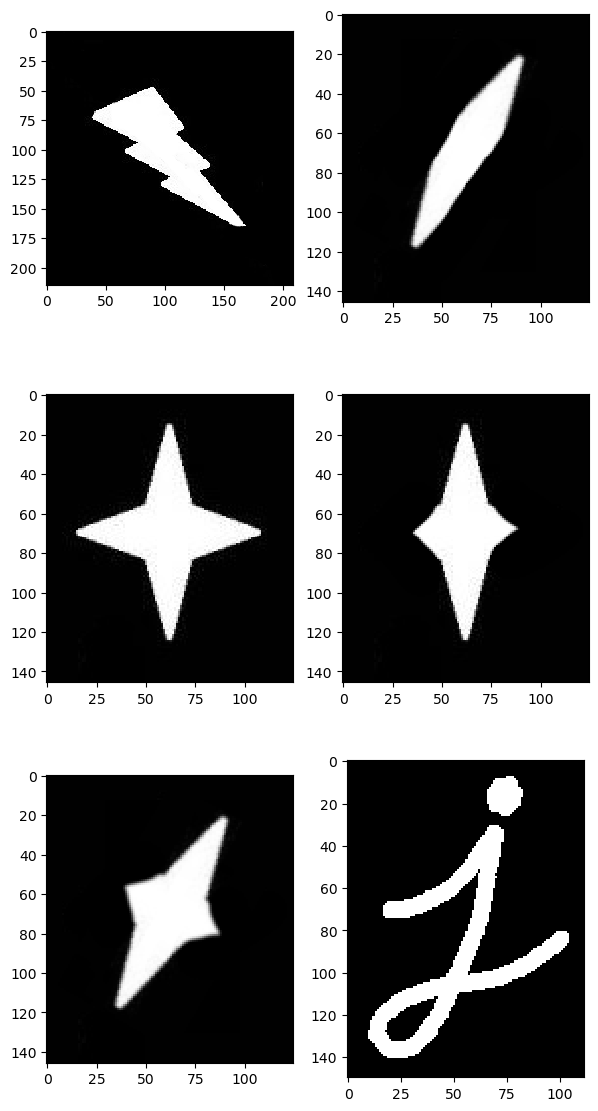

In [39]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [40]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [28]:
# Your Answer

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


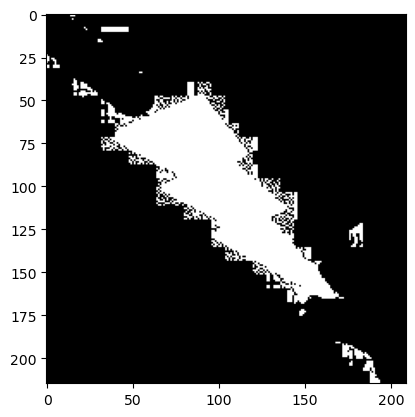

In [41]:
_, lightningbolt = cv2.threshold(lightningbolt,0,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [36]:
#
# 127 would be a good thresholding value because it is in the middle of the greyscale values, which are 0 - 255. 
# Lighter grays will become white, and darker grays will become black.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

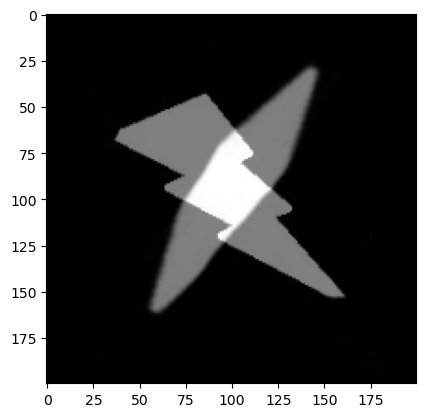

In [77]:
# 1. Blend
img1 = cv2.imread('shapes/lightningbolt.png')
img2 = cv2.imread('shapes/blob.png')
img1 = cv2.resize(img1, (200,200))
img2 = cv2.resize(img2, (200,200))
dst = cv2.addWeighted(img1,0.5,img2,0.5,0)
plt.imshow(dst, cmap='gray');

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

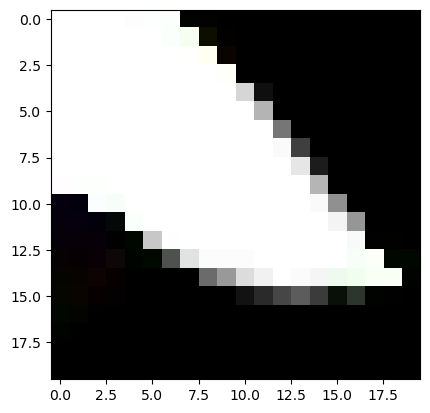

In [84]:
# 2. ROI
lightningbolt = cv2.imread('shapes/lightningbolt.png')
point = lightningbolt[150:170, 150:170]
plt.imshow(point, cmap='gray');

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

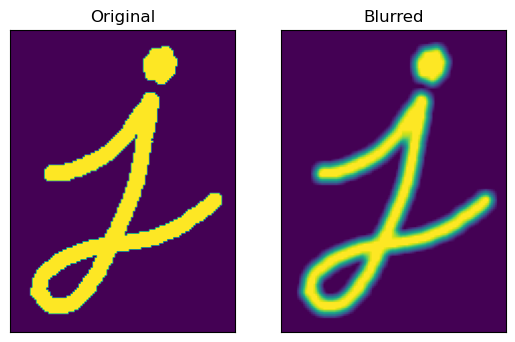

In [105]:
# 3. 
letterj = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
blur = cv2.blur(letterj,(5,5))
plt.subplot(121),plt.imshow(letterj),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

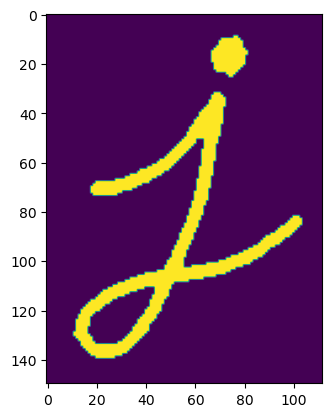

In [95]:
# 4
letterj = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion)

## 5. Perform erosion on j with a 5x5 kernel

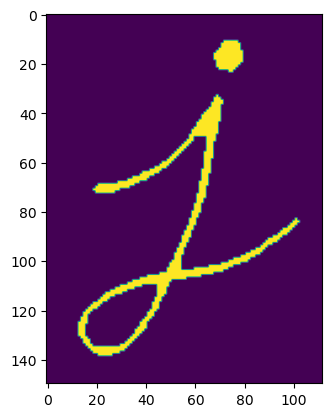

In [96]:
# 5
letterj = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion)

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



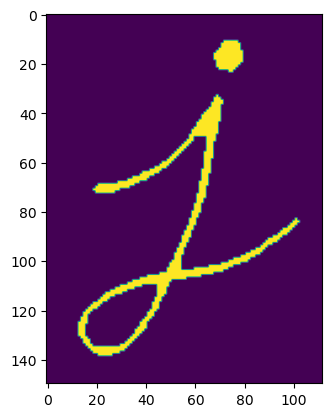

In [100]:
# 6
letterj = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 2)
plt.imshow(erosion)

## 7. Perform dilation on j with a 3x3 kernel

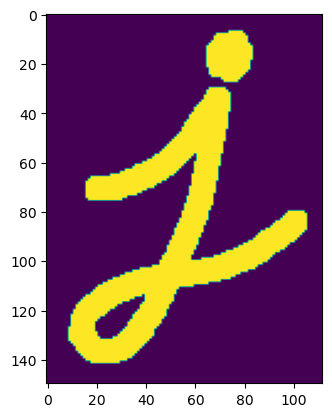

In [102]:
# 7
letterj = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation)

## 8. Perform dilation on j with a 5x5 kernel

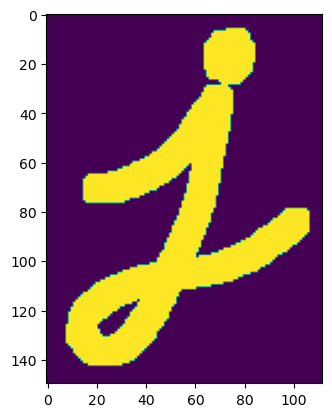

In [103]:
# 8
letterj = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation)

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# 9
# The kernel size effects the scale of the morphology operation (how much is eroded, dilated, etc)

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# 10
# The difference between repeated iterations of a morphology operation with a small kernel vs a single iteration with a large kernel is that
# repeated iterations will change the image by repeating the smaller kernel value, while a larger kernel increases the space the change is effected
# onto in one go. They can get similar resuilts, for example using 3 x 3 twice compared to 5 x 5 once.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

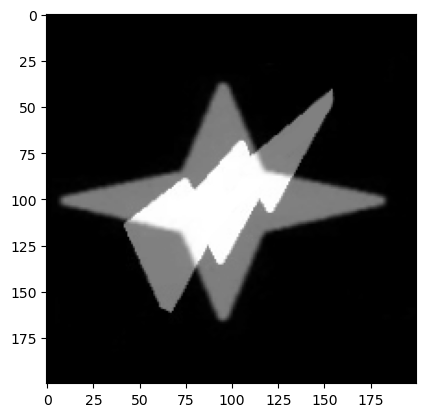

In [116]:
# 11
lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
rows,cols = lightningbolt.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst1 = cv2.warpAffine(lightningbolt,M,(cols,rows))

star = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
rows,cols = star.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst2 = cv2.warpAffine(star,M,(cols,rows))


img1 = cv2.resize(dst1, (200,200))
img2 = cv2.resize(dst2, (200,200))

dst = cv2.addWeighted(img1,0.5,img2,0.5,0)
plt.imshow(dst, cmap='gray')

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

In [ ]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]
final = []

for n in images:
    final.append(cv2.Laplacian(n,cv2.CV_64F))
    final.append(cv2.Sobel(n,cv2.CV_64F,1,0,ksize=5))
    final.append(cv2.Sobel(n,cv2.CV_64F,0,1,ksize=5))
    part1 = cv2.addWeighted(cv2.Laplacian(n,cv2.CV_64F),0.5,cv2.Sobel(n,cv2.CV_64F,1,0,ksize=5),0.5,0)
    dst = cv2.addWeighted(part1,0.66,cv2.Sobel(n,cv2.CV_64F,0,1,ksize=5),0.34,0)
    final.append(dst)
    

fig,ax = plt.subplots(nrows=6, ncols=4)
for a,i in zip(ax.flatten(), final):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 